In [1]:
import matplotlib
import matplotlib.pyplot as plt
import sys, os
sys.path.append('..')
result_dir = os.path.join(os.path.dirname(os.getcwd()), 'result', 'cosmo')
figure_dir = os.path.join(os.path.dirname(os.getcwd()), 'figure')
from experiment.cosmology import binning
from src.plot import plot_recovery

import torch
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import matplotlib

plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'

/opt/homebrew/anaconda3/envs/sbi_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
matplotlib.rcParams.update({
    'font.family' : 'serif',
    'font.size' : 14.0,
    'lines.linewidth' : 2,
    'lines.antialiased' : True,
    'axes.facecolor': 'fdfdfd',
    'axes.edgecolor': '777777',
    'axes.linewidth' : 1,
    'axes.titlesize' : 'medium',
    'axes.labelsize' : 'medium',
    'axes.axisbelow' : True,
    'xtick.major.size'     : 3,      # major tick size in points
    'xtick.minor.size'     : 3,      # minor tick size in points
    'xtick.major.pad'      : 6,      # distance to major tick label in points
    'xtick.minor.pad'      : 6,      # distance to the minor tick label in points
    'xtick.color'          : '333333', # color of the tick labels
    'xtick.labelsize'      : 'medium', # fontsize of the tick labels
    'xtick.direction'      : 'in',     # direction: in or out
    'ytick.major.size'     : 1,      # major tick size in points
    'ytick.minor.size'     : 1,      # minor tick size in points
    'ytick.major.pad'      : 6,      # distance to major tick label in points
    'ytick.minor.pad'      : 6,      # distance to the minor tick label in points
    'ytick.color'          : '333333', # color of the tick labels
    'ytick.labelsize'      : 'medium', # fontsize of the tick labels
    'ytick.direction'      : 'in',     # direction: in or out
    'axes.grid' : False,
    'grid.alpha' : 0.3,
    'grid.linewidth' : 1,
    'legend.fancybox' : True,
    'legend.fontsize' : 'Small',
    'figure.figsize' : (2.5, 2.5),
    'figure.facecolor' : '1.0',
    'figure.edgecolor' : '0.5',
    'hatch.linewidth' : 0.1,
    'text.usetex' : True
    })

In [2]:
n = 20
n_0 = 980; n_1 = 20;
mlmc_net_name = 'cosmo_mlmc_n_' + str(n_0) + '_' + str(n_1)
mc_net_high_name = 'cosmo_mc_n_' + str(n)

mlmc_net = torch.load(os.path.join(result_dir, mlmc_net_name + '_one_param.pt'), map_location = torch.device('cpu'))
mc_net_high = torch.load(os.path.join(result_dir, mc_net_high_name + '_one_param.pt'), map_location = torch.device('cpu'))

/var/folders/r6/jlzvq0td5mqf05q5jm6fs2vm0000gp/T/ipykernel_15256/2091222072.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mlmc_net = torch.load(os.path.join(result_dir

In [3]:
x_high = np.load('../data/x_high.npy')
theta = np.loadtxt('../data/CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt', skiprows = 1, usecols = (1, 2, 3, 4, 5, 6)) 

theta_test = torch.tensor(theta[n:, 1], dtype = torch.float32).unsqueeze(1)
x_test = torch.tensor(x_high[n:,:], dtype = torch.float32)

In [103]:
# post_mlmc_absolute = mlmc_net_absolute.sample_unstandardized(num_samples = 3000, condition = x_test)
post_mlmc = mlmc_net.sample_unstandardized(num_samples = 2000, condition = x_test).detach().numpy()
post_mc = mc_net_high.sample_unstandardized(num_samples = 2000, condition = x_test).detach().numpy()

/var/folders/r6/jlzvq0td5mqf05q5jm6fs2vm0000gp/T/ipykernel_15256/3776608596.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r"ML-NPE", r"NPE"], fontsize = 17, rotation = 0)
/var/folders/r6/jlzvq0td5mqf05q5jm6fs2vm0000gp/T/ipykernel_15256/3776608596.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


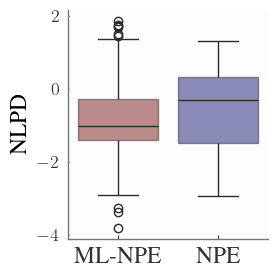

In [25]:
# nlpd_mlmc_abs = - mlmc_net_absolute.log_prob_unstandardized(theta_test, x_test, log = True).detach().numpy()
nlpd_mlmc = - mlmc_net.log_prob_unstandardized(theta_test, x_test, log = True).detach().numpy()
nlpd_mc = - mc_net_high.log_prob_unstandardized(theta_test, x_test, log = True).detach().numpy()
# nlpd_mc_more = - mc_high_more.log_prob_unstandardized(theta_test, x_test, log = True).detach().numpy()


f, ax = plt.subplots(figsize = (3, 3))
colors = ["#850D0C", "#0C0C85"]
colors_violin = ["#BA8D8C", "#8C8CB9", "#8C8CB9"]
# sns.violinplot([nlpd_mlmc, nlpd_mc], ax = ax, palette = colors_violin)
sns.boxplot([nlpd_mlmc[nlpd_mlmc < 2], nlpd_mc], ax = ax, palette = colors)
ax.set_xlabel('')
ax.set_ylabel('NLPD', fontsize = 17)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([r"ML-NPE", r"NPE"], fontsize = 17, rotation = 0)
ax.tick_params(axis='y', labelsize = 13)

for patch in ax.patches:
    patch.set_alpha(0.5)
f.tight_layout()
f.show()

In [69]:
for q in [0.025, 0.05, 0.25, 0.5, 0.75, 0.95, 0.975]:
    print(q, ' percent:', round(np.quantile(nlpd_mlmc, q), 2), round(np.quantile(nlpd_mc, q), 2))

0.025  percent: -2.07 -2.38
0.05  percent: -1.87 -2.2
0.25  percent: -1.41 -1.47
0.5  percent: -0.98 -0.3
0.75  percent: -0.24 0.32
0.95  percent: 0.58 0.73
0.975  percent: 1.08 0.85


In [39]:
np.quantile(nlpd_mlmc, 0.025), np.quantile(nlpd_mc, 0.025)

(-2.0716283082962037, -2.3812752783298494)

In [77]:
q_1 = [0.025, 0.05, 0.25]
q_2 = [0.975, 0.95, 0.75]

for i in range(3):
    print(100 * (q_2[i] - q_1[i]), 'quantile:', round(np.quantile(nlpd_mlmc, q_2[i]) - np.quantile(nlpd_mlmc, q_1[i]), 2), 
           round(np.quantile(nlpd_mc, q_2[i]) - np.quantile(nlpd_mc, q_1[i]), 2))

95.0 quantile: 3.15 3.23
89.99999999999999 quantile: 2.45 2.92
50.0 quantile: 1.17 1.8


In [104]:
print("var of MLMC:", round(np.var(nlpd_mlmc), 2), "\n", "var of MC:", round(np.var(nlpd_mc), 2), "\n", 
      "var of MLMC (nlpd < 1.8):", round(np.var(nlpd_mlmc[nlpd_mlmc < 1.8]), 2),  "\n",
      "fraction of NONE outliers:", round(np.sum(nlpd_mlmc < 1.8) / len(nlpd_mlmc), 2))

var of MLMC: 0.78 
 var of MC: 0.98 
 var of MLMC (nlpd < 1.8): 0.6 
 fraction of NONE outliers: 0.99


In [85]:
np.var(nlpd_mlmc[nlpd_mlmc < 1.8]), np.var(nlpd_mc)

(0.5970574, 0.98161757)

In [83]:
nlpd_mlmc[nlpd_mlmc < 1.8].shape

(968,)

In [61]:
f.savefig(os.path.join(figure_dir, 'cosmo_nlpd_one_param.pdf'), bbox_inches = 'tight')

In [68]:
coverage_mlmc = np.load(os.path.join(result_dir, 'coverage_' + mlmc_net_name + '.npy'))
coverage_mc = np.load(os.path.join(result_dir,  'coverage_'  + mc_net_high_name + '.npy'))
confidence_level = np.linspace(0, 1, 101)

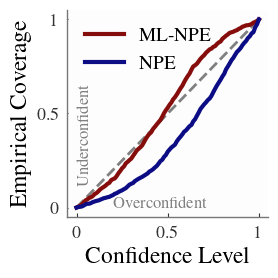

In [ ]:
 # ax.set_title("Cosmology")
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.set_xticks([0, 0.5, 1])
ax.set_xticklabels(["0", "0.5", "1"], fontsize = 13)
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(["0", "0.5", "1"], fontsize = 13)
ax.plot([0, 1], [0, 1], "--", color="grey", linewidth = 2)
ax.plot(confidence_level, coverage_mlmc, label="ML-NPE", linewidth = 3, color = colors[0])
ax.plot(confidence_level, coverage_mc, label="NPE", linewidth = 3, color = colors[1])
ax.legend(loc = "upper left", fontsize = 14, frameon = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.2, 0.0, 'Overconfident', fontsize=12, color='grey', rotation  = 0)
ax.text(0.0, 0.13, 'Underconfident', fontsize=12, color='grey', rotation  = 90)

# fig.set_size_inches(7.5, 3.8)
ax.set_ylabel("Empirical Coverage", fontsize = 17)
ax.set_xlabel("Confidence Level",  fontsize = 17)
# fig.text(0.54, -0.0, "Confidence Level", ha='center', fontdict={"fontsize": "medium"})
fig.tight_layout()

In [58]:
fig.savefig(os.path.join(figure_dir, 'cosmo_coverage_one_param.pdf'), bbox_inches = 'tight')

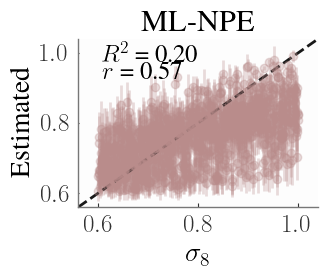

In [117]:
f = plot_recovery(post_mlmc, theta_test, color = "#B98C8B", param_names = ["ML-NPE", "", "", ""], add_r2 = True, xlabel = [r"$\sigma_8$", "", "", ""], 
                 fig_size = (3.5, 3), title_fontsize = 22, label_fontsize = 20, metric_fontsize = 18, tick_fontsize = 18)

In [118]:
f.savefig(os.path.join(figure_dir, 'cosmo_recovery_mlmc.pdf'), bbox_inches = 'tight', dpi = 300)

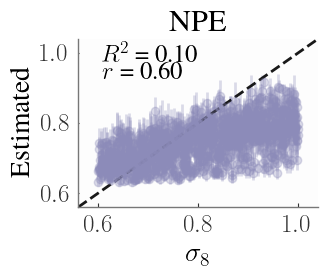

In [119]:
f = plot_recovery(post_mc, theta_test, color = "#8C8BB9", param_names = ["NPE", "", "", ""], add_r2 = True, xlabel = [r"$\sigma_8$", "", "", ""], 
                 fig_size = (3.5, 3), title_fontsize = 22, label_fontsize = 20, metric_fontsize = 18, tick_fontsize = 18)

In [120]:
f.savefig(os.path.join(figure_dir, 'cosmo_recovery_mc.pdf'), bbox_inches = 'tight', dpi = 300)